In [48]:
import pandas as pd

In [49]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [50]:
# Data preprocessing

In [51]:
# lower case

In [52]:
df['Review']=df['Review'].str.lower()

In [53]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [54]:
# Removing punctuations

In [55]:
import string
string.punctuation
exclude=string.punctuation

In [56]:
def remove_punch(x):
    for i in exclude:
        x=x.replace(i,'')
    return x

In [57]:
df['Review']=df['Review'].apply(remove_punch)

In [58]:
# feature Extraction

In [59]:
# Apply TF-IDF vectorizer on preprocessed Data

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tf= TfidfVectorizer()
x=tf.fit_transform(df['Review']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
y=df['Liked']

In [63]:
# train test split

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [65]:
xtrain.shape

(800, 2067)

In [66]:
# Build Neural Network

In [67]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping


In [68]:
model=Sequential()

In [69]:
# add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# create dense layer 1
model.add(Dense(units=128, activation='relu'))

# create dropout layer1 
model.add(Dropout(rate=0.5))

# create dense layer 2
model.add(Dense(units=64, activation='relu'))

# create dropout layer 2
model.add(Dropout(rate=0.5))

# create output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# model complilation
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Add earlystopping
es=EarlyStopping(monitor='val_loss',patience=15)

In [70]:
hist=model.fit(xtrain,ytrain,validation_split=0.1, epochs=100, callbacks=[es])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5128 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5806 - loss: 0.6856 - val_accuracy: 0.6500 - val_loss: 0.6837
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7541 - loss: 0.6641 - val_accuracy: 0.7250 - val_loss: 0.6641
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8081 - loss: 0.6096 - val_accuracy: 0.8125 - val_loss: 0.6094
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8927 - loss: 0.4954 - val_accuracy: 0.8125 - val_loss: 0.5177
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9263 - loss: 0.3252 - val_accuracy: 0.8250 - val_loss: 0.4410
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9706 - loss: 0.1832 - val_accuracy: 0.8125 - val_loss: 0.4047
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9871 - loss: 0.1082 - val_accuracy: 0.7875 - 

In [71]:
model.evaluate(xtrain,ytrain)
model.evaluate(xtest,ytest)

 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 7.2499e-04

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0076     
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.7314 


[0.5899415612220764, 0.7900000214576721]

In [72]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [73]:
ypred_tr=[]
for i in yprob_train:
    if i<0.5:
        ypred_tr.append(0)
    else:
        ypred_tr.append(1)

In [74]:
ypred_tr[:5]

[1, 0, 1, 1, 0]

In [75]:
ypred_ts=[]
for i in yprob_test:
    if i<0.5:
        ypred_ts.append(0)
    else:
        ypred_ts.append(1)

In [76]:
ypred_ts[:5]

[0, 1, 0, 1, 0]

In [77]:
# model evaluation

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

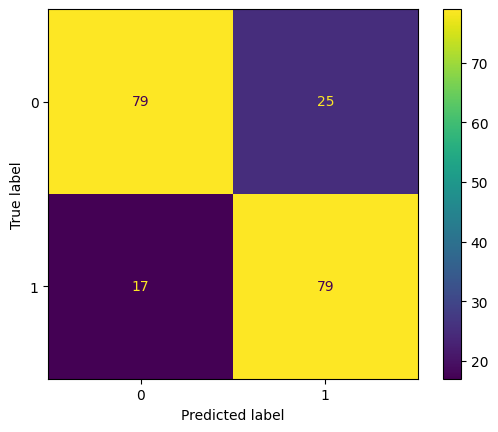

In [79]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [80]:
import pickle

In [81]:
with open('model.pkl', 'wb') as file2:
    pickle.dump(model,file2)

In [82]:
with open('model.pkl' , 'rb') as file4:  
    m= pickle.load(file4)

In [83]:
with open('TfidfVectorizer.pkl', 'wb') as file3:
    pickle.dump(tf,file3)

In [85]:
with open('TfidfVectorizer.pkl' , 'rb') as file5:  
    n= pickle.load(file5)